# 10. Διαγράμματα

Στόχος της τρέχουσας ενότητας είναι να παρουσιαστούν οι δυνατότητες που προσφέρει η Python για την οπτικοποίηση δεδομένων σε διαγράμματα. Για την δημιουργία των διαγραμμάτων θα χρησιμοποιηθεί η βιβλιοθήκη [seaborn] (https://seaborn.pydata.org/).

## Ειδική ενότητα για εκτέλεση στο Google Colab

In [1]:
# έλεγχος αν το notebook τρέχει στο google colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
# αν το notebook τρέχει στο colab, mount το Google Drive και αλλαγή στο directory που έχει γίνει clone το github repository.
# εγκατάσταση απαραίτητων βιβλιοθηκών
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/Colab\ Notebooks/programming/notebooks
    !pip install pandas seaborn

In [3]:
import pandas as pd # η βιβλιοθήκη pandas για την διαχείριση πινάκων

import seaborn as sns # η βιβλιοθήκη seaborn  για δημιουργία διαγραμμάτων 
import matplotlib.pyplot as plt # η βιβλιοθήκη seaborn  για δημιουργία διαγραμμάτων, πιο σύνθετη
sns.set() # ορισμός προκαθορισμένων ρυθμίσεων για την βιβλιοθήκη matplotlib και seaborn (themes, fonds, scaling, color palette)

## Διαγράμματα με γραμμές (line plots), ραβδογράμματα (bar plots), γραφήματα πίτας (pie charts)

Στο παρακάτω παράδειγμα θα παρουσιαστεί σε μορφή διαγράμματος με γραμμές (line chart) η διαχρονική εξέλιξη του πληθυσμού για την περίοδο 2010-2020 για μια σειρά από χώρες. 

Για την επίδειξη της δημιουργίας ενός διαγράμματος σε γραμμές θα χρησιμοποιηθούν διαδέσιμα δεδομένα από την πλατφόρμα [kaggle](https://www.kaggle.com/).

### Πληθυσμός ανά χώρα για την περίοδο 2010-2020


**Πηγή**: Kaggle, Countries population. 2010 - 2020 data. ISO codes, https://www.kaggle.com/datasets/cityapiio/countries-population-2010-2020-data (Πρόσβαση, 28/12/2022)


Το εν λόγω dataset περιλαμβάνει ανα έτος τον πληθυσμό ανά χώρα για την περίοδο 2010-2020.

Αρχικά διαβάζουμε το αρχείο csv και προσαρτούμε τα περιεχόμενά του σε μια νέα μεταβλητή με το όνομα `mydata`.

In [4]:
mydata = pd.read_csv("../docs/plots_data/countries_general_info_historical.24-10-2021.csv") # 

Σύντομη προεπισκόπηση:

In [5]:
mydata.head()

,Name,NativeName,CallingCode,Iso3166P1Alpha2Code,Iso3166P1Alpha3Code,Iso3166P1NumericCode,Isni,"Population, 2010","Population, 2011","Population, 2012","Population, 2013","Population, 2014","Population, 2015","Population, 2016","Population, 2017","Population, 2018","Population, 2019"
0,Canada,Canada,1,CA,CAN,124,0000 0001 2238 5050,34004889,34339328,34714222,35082954,35437435,35702908,36109487,36545295,37065178,37593384
1,Japan,日本,81,JP,JPN,392,0000 0001 2364 9740,128070000,127833000,127629000,127445000,127276000,127141000,126994511,126785797,126529100,126264931
2,Norway,Kongeriket Norge,47,NO,NOR,578,0000 0001 2298 9524,4889252,4953088,5018573,5079623,5137232,5188607,5234519,5276968,5311916,5347896
3,Ireland,Eire,353,IE,IRL,372,0000 0001 2359 1198,4560155,4580084,4599533,4623816,4657740,4701957,4755335,4807388,4867316,4934040
4,Hungary,Magyarorszag,36,HU,HUN,348,0000 0001 2254 0380,10000023,9971727,9920362,9893082,9866468,9843028,9814023,9787966,9775564,9771141


Τα δεδομένα είναι διαθέσιμα σε μορφή _wide_. Αυτό σημαίνει ότι ο πληθυσμός κάθε έτους δίδεται σε διαφορετική στήλη. Για την ευκολότερη αξιοποίηση των δεδομένων πρέπει να μετατρέψουμε τα δεδομένα σε μορφή _long_. 

(_Διαβάστε για την διαφορά μεταξύ wide και long data format [εδώ](https://www.statology.org/long-vs-wide-data/)._)

Μετατροπή και προεπισκόπηση:

In [6]:
mydata_long = pd.wide_to_long(mydata, stubnames=["Population"], i="Name", j="year", sep=", ")
mydata_long

,,CallingCode,Isni,Iso3166P1Alpha2Code,Iso3166P1Alpha3Code,Iso3166P1NumericCode,NativeName,Population
Name,year,,,,,,,
Canada,2010,1,0000 0001 2238 5050,CA,CAN,124,Canada,34004889
Japan,2010,81,0000 0001 2364 9740,JP,JPN,392,日本,128070000
Norway,2010,47,0000 0001 2298 9524,NO,NOR,578,Kongeriket Norge,4889252
Ireland,2010,353,0000 0001 2359 1198,IE,IRL,372,Eire,4560155
Hungary,2010,36,0000 0001 2254 0380,HU,HUN,348,Magyarorszag,10000023
...,...,...,...,...,...,...,...,...
Somalia,2019,252,0000 0001 2173 591X,SO,SOM,706,Jamhuuriyadda Federaalka Soomaaliya,15442905
Sudan,2019,249,0000 0001 2165 5557,SD,SDN,729,جمهورية السودان,42813238
Eswatini,2019,268,0000 0001 2110 7657,SZ,SWZ,748,Umbuso weSwatini,1148130


Μετά την μετατροπή οι στήλες με τον πληθυσμό ανά έτος συγχωνεύτηκαν σε δύο στήλες μόνο. Η στήλη _Population_ περιλαμβάνει τον πληθυσμό και η στήλη _year_ περιλαμβάνει το έτος.

Σαν πρώτο παράδειγμα θα χρησιμοποιήσουμε μόνο τα δεδομένα της Ελλάδας, φιλτράροντας με βάση το πεδίο _Iso3166P1Alpha2Code_.

In [7]:
mydata_long=mydata_long[mydata_long.Iso3166P1Alpha2Code.isin(["GR"])]
mydata_long.head(5)


CallingCode                 Isni Iso3166P1Alpha2Code  \
Name   year                                                         
Greece 2010           30  0000 0004 0555 2357                  GR   
       2011           30  0000 0004 0555 2357                  GR   
       2012           30  0000 0004 0555 2357                  GR   
       2013           30  0000 0004 0555 2357                  GR   
       2014           30  0000 0004 0555 2357                  GR   

            Iso3166P1Alpha3Code  Iso3166P1NumericCode NativeName  Population  
Name   year                                                                   
Greece 2010                 GRC                   300     Ελλάδα    11121341  
       2011                 GRC                   300     Ελλάδα    11104899  
       2012                 GRC                   300     Ελλάδα    11045011  
       2013                 GRC                   300     Ελλάδα    10965211  
       2014                 GRC                   300     Ελλάδα    10892413

#### Διάγραμμα γραμμής
Στην συνέχεια φτιάχνουμε ένα διάγραμμα με γραμμές με βάση τα δεδομένα της Ελλάδας.

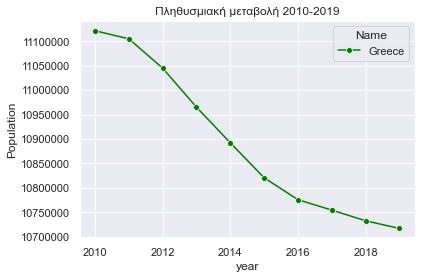

In [8]:
mydata_long2 =mydata_long.reset_index()

# create plot
myplot = sns.lineplot(x = "year", y = "Population", data=mydata_long, hue="Name",marker="o", palette=["green"] )
myplot.set(title='Πληθυσμιακή μεταβολή 2010-2019') # Ορισμός τίτλου
myplot.ticklabel_format(style='plain', axis='y') # ορισμός y axis labels σε plain format αντι scientific
plt.show()

#### Ραβδόγραμμα

Μπορούμε να αποδώσουμε το παραπάνω διάγραμμα και σαν ραβδόγραμμα όπου το μέγεθος του πληθυσμού κάθε έτους είναι μια στήλη το ύψος της οποίας εξαρτάται από το μέγεθος του πληθυσμού.

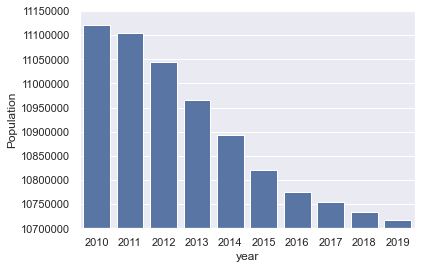

In [9]:
# bar plot
myplot = sns.barplot(x = "year", y = "Population", data = mydata_long2)
myplot.ticklabel_format(style='plain', axis='y')
plt.ylim(10700000, 11150000)
plt.show()

Είναι δυνατή η δημιουργία διαγράμματος γραμμών με πολλαπλές γραμμές όπου κάθε γραμμή αντιστοιχεί στην διαχρονική μεταβολή του πληθυσμού διαφορετικής χώρας. 
Φιλτράρουμε τον αρχικό πίνακα (dataframe) και κρατάμε όσες χώρες είχαν πληθυσμό το 2019 > 10500000 και < 11500000. Αντίστοιχα μετατρέπουμε το φορμάτ του πίνακα από _wide_ σε _long_.

In [10]:
mydata_2 =mydata[(mydata['Population, 2019'] > 10500000) & (mydata['Population, 2019'] < 11500000)]
mydata_long2 = pd.wide_to_long(mydata_2, stubnames=["Population"], i="Name", j="year", sep=", ")
#mydata_long2

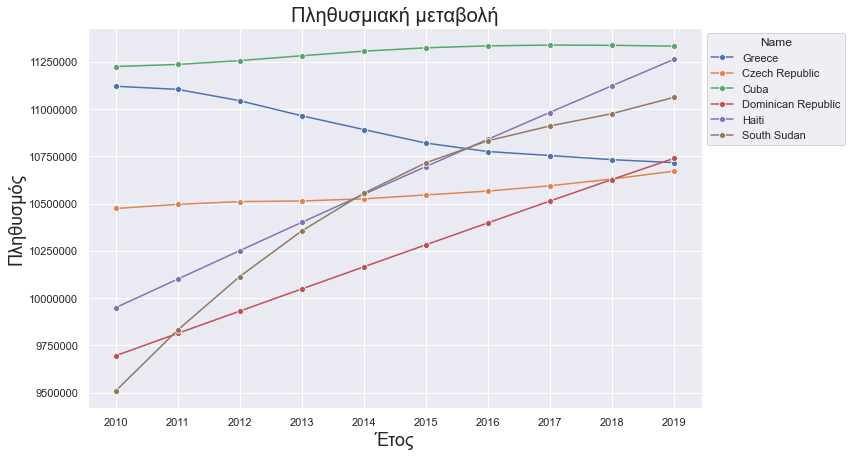

In [11]:
fig, myplot = plt.subplots(figsize = (11,7))
myplot = sns.lineplot(x = "year", y = "Population", data=mydata_long2, hue="Name",marker="o" )
myplot.axes.set_title("Πληθυσμιακή μεταβολή",fontsize=20)
myplot.set_xticks(mydata_long2.index.get_level_values(level="year").unique().tolist())
myplot.set_xlabel('Έτος', fontsize = 18)
myplot.set_ylabel ('Πληθυσμός', fontsize = 18)
myplot.ticklabel_format(style='plain', axis='y')
#myplot.legend(loc='upper right', fontsize = 15);
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

In [12]:
mydata_long2[mydata_long2.index.isin([2019], level='year')]

,,CallingCode,Isni,Iso3166P1Alpha2Code,Iso3166P1Alpha3Code,Iso3166P1NumericCode,NativeName,Population
Name,year,,,,,,,
Greece,2019,30,0000 0004 0555 2357,GR,GRC,300,Ελλάδα,10717169
Czech Republic,2019,420,0000 0001 2290 990X,CZ,CZE,203,Ceska republika,10671870
Cuba,2019,53,NaN,CU,CUB,192,Republica de Cuba,11333483
Dominican Republic,2019,1809,0000 0001 2370 0622,DO,DOM,214,República Dominicana,10738958
Haiti,2019,509,0000 0004 0466 965X,HT,HTI,332,Ayiti,11263077
South Sudan,2019,211,0000 0004 4647 7322,SS,SSD,728,Republic of South Sudan,11062113


#### Γράφημα πίτας

Αν θέλουμε να εκφράσουμε γραφικά την αναλογία του πληθυσμού του 2019 κάθε χώρας σε σχέση με το σύνολο τους τότε μπορούμε να χρησιμοποιήσουμε ένα διάγραμμα "πίτας" (pie chart).

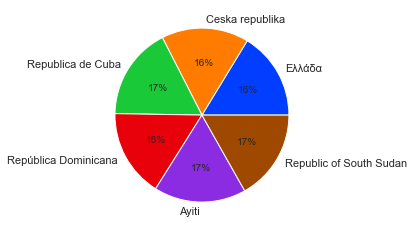

In [13]:
# pie chart
df = mydata_long2[mydata_long2.index.isin([2019], level='year')]
palette_color = sns.color_palette('bright')

pie = plt.pie(df['Population'], labels = df['NativeName'], colors = palette_color, autopct='%.0f%%')
plt.show()

## Ιστόγραμμα συχνοτήτων, θηκόγραμμα

Στην ενότητα αυτή θα χρησιμοποιηθούν δεδομένα πληθυσμού ανά έτος και περιφέρεια NUTS2 για την περίοδο 2010 - 2021.

(**Πηγή**: Εurostat, Population and demography, Demography, population stock and balance, Population on 1 January by NUTS 2 region, https://ec.europa.eu/eurostat/web/population-demography/demography-population-stock-balance/database (Πρόσβαση 28/12/2022) _

Ανάγνωση του σχετικού αρχείο δεδομένων:

In [14]:
nuts2 = pd.read_csv("../docs/plots_data/eurostat/tgs00096_page_linear.csv") # 


Φιλτράρουμε μόνο τον πληθυσμό για το 2021

In [15]:
nuts2_2021 = nuts2[nuts2['TIME_PERIOD'] == 2021] 

### Ιστόγραμμα συχνοτήτων

Το ιστόγραμμα συχνοτήτων περιγράφει την κατανομή μίας μεταβλητής. Μετράει τον αριθμό των παρατηρήσεων που περιέχονται ανά κλάση τιμών.

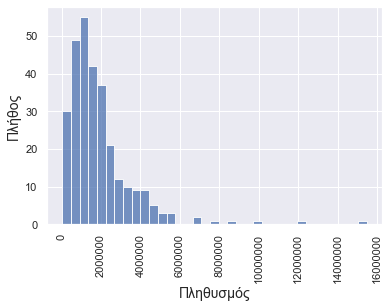

In [16]:
myplot = sns.histplot(data=nuts2_2021, x="OBS_VALUE", bins=35)
myplot.ticklabel_format(style='plain', axis='x')
myplot.set_xlabel('Πληθυσμός', fontsize = 14)
myplot.set_ylabel ('Πλήθος', fontsize = 14)
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize": (10, 8)})
plt.show()

### Θηκόγραμμα (box-plot)

Το θηκόγραμμα περιγράφει την κατανομή μιας μεταβλητής μέσω της οπτικοποίησης του διαμέσου, του ενδοτεταρτημοριακού εύρους, του upper και lower whisker.

![alt text](https://github.com/kokkytos/programming/raw/main/images/Box-Plot-and-Whisker-Plot-1.png)

Δημιουργία θηκογράμματος

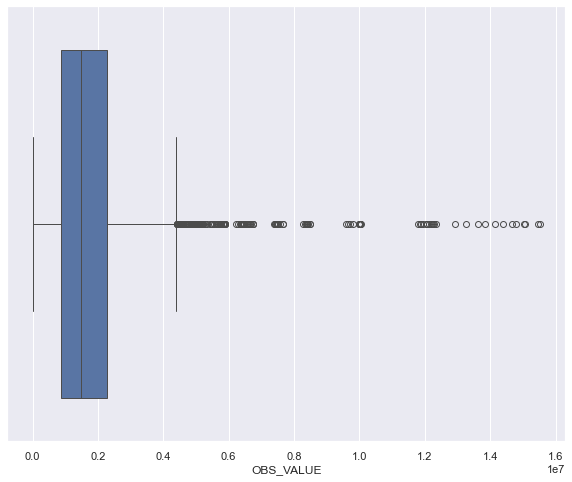

In [17]:
sns.boxplot(data=nuts2_2021, x=nuts2["OBS_VALUE"])
plt.show()

Για λόγους σύγκρισης μπορούμε να δημιουργήσουμε πολλαπλά θηκογράμματα με κριτήριο κατηγοριοποίησης των δεδομένων μια κατηγορική μεταβλητή.
Στο συγκεκριμένο παράδειγμα χρησιμοποιούμε σαν κριτηρίο κατηγοριοποίησης την μεταβλητή `TIME_PERIOD` αφού πρώτα την μετατρέψουμε σε κατηγορική. Το αποτέλεσμα του παρακάτω κώδικα θα είναι να πάρουμε ένα θηκόγραμμα για τα δεδομένα κάθε έτους.

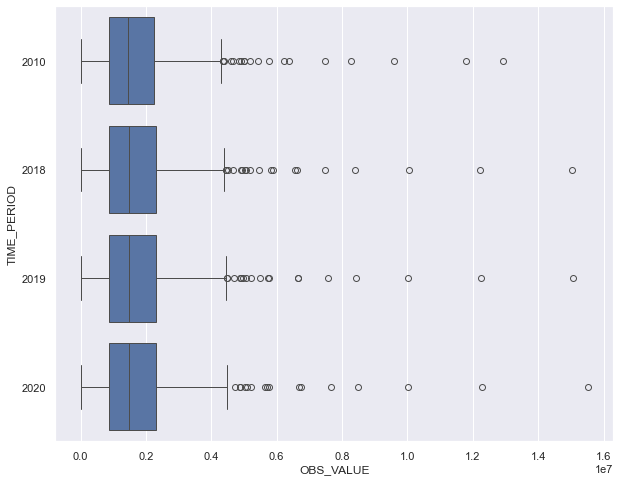

In [18]:
nuts2 = nuts2[nuts2['TIME_PERIOD'].isin([2010,2018,2019,2020])] 
nuts2['TIME_PERIOD'] = nuts2.TIME_PERIOD.astype('category') # SOS
sns.boxplot(data=nuts2,  x="OBS_VALUE", y="TIME_PERIOD")
plt.show()

Επιπλέον είναι εφικτό να δημιουργήσουμε ξεχωριστά θηκογράμματα ανά έτος μέσω της συνάρτησης _FacetGrid_:

In [19]:
nuts2['TIME_PERIOD']

2       2018
3       2019
4       2020
8       2018
9       2019
        ... 
3816    2019
3823    2018
3824    2019
3825    2010
3833    2018
Name: TIME_PERIOD, Length: 1274, dtype: category
Categories (4, int64): [2010, 2018, 2019, 2020]

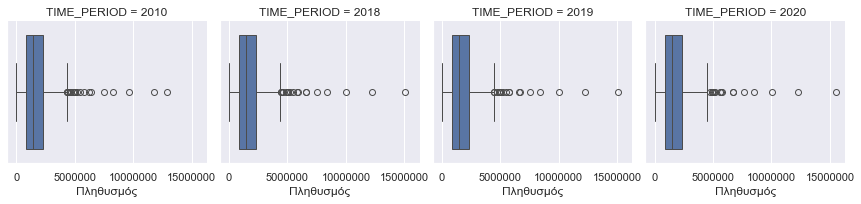

In [20]:
g = sns.FacetGrid(nuts2, col="TIME_PERIOD", height=3, col_wrap=4)

g.map(sns.boxplot, "OBS_VALUE", order=None)
g.set_xlabels('Πληθυσμός', fontsize = 12)
for ax in g.axes.flatten(): 
    ax.ticklabel_format(style='plain', axis='x')

plt.show()

Αντίστοιχα μπορούμε να κάνουμε το ίδιο με πολλαπλά ιστογράμματα. Το σημαντικό είναι να αλλάξουμε την τιμή της παραμέτρου που δέχεται η συνάρτηση _g.map_ από _sns.boxplot_ σε _sns.histplot_.

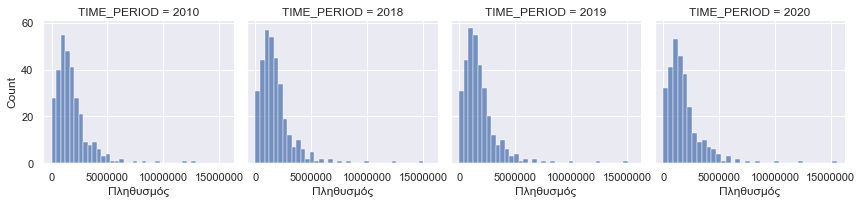

In [21]:
g = sns.FacetGrid(nuts2, col="TIME_PERIOD", height=3, col_wrap=4)
g.map(sns.histplot, "OBS_VALUE")
g.set_xlabels('Πληθυσμός', fontsize = 12)
for ax in g.axes.flatten(): 
    ax.ticklabel_format(style='plain', axis='x')

plt.show()

## Διάγραμμα διασποράς (scatterplot), φυσαλίδων (bubble chart), μήτρας συσχετίσεων (correlation matrix), συντελεστής συσχέτισης, γραμμή παλινδρόμησης


In [22]:
# Deaths by age, sex and NUTS 2 region
#https://ec.europa.eu/eurostat/databrowser/view/demo_r_magec/default/table?lang=en

Στην τρέχουσα ενότητα παρουσιάζεται η δημιουργία ενός διαγράμματος διασποράς με την χρήση οικονομικών δεδομένων από την Ελληνική στατιστική υπηρεσία (ΕΛ.ΣΤΑΤ.).
Θα χρησιμοποιηθεί ο Οικονομικά ενεργός και μη ενεργός πληθυσμός, οι απασχολούμενοι κατά τομέα οικονομικής δραστηριότητας, και οι άνεργοι για τους δήμους της Ελλάδας.

(**Πήγη**: ΕΛΣΤΑΤ, Οικονομικά χαρακτηριστικά 2011, 23. Οικονομικά ενεργός και μη ενεργός πληθυσμός, απασχολούμενοι κατά τομέα οικονομικής δραστηριότητας, άνεργοι. Δήμοι, https://www.statistics.gr/el/statistics/-/publication/SAM04/2011 (Πρόσβαση 28/12/2022))


Ανάγνωση του σχετικού αρχείου δεδομένων:

In [23]:
econ_data = pd.read_csv("../docs/plots_data/A1602_SAM04_TB_DC_00_2011_B23_F_GR.csv",sep=';') 
#econ_data.head()

Το αρχείο περιλαμβάνει δεδομένα για διαφορετικά διοικητικά επίπεδα. 
Κρατάμε μόνο τους δήμους (έχουν Επίπεδο διοικητικής διαίρεσης με τιμή 3) και αφαιρούμε το Άγιο Όρος.

In [24]:
econ_data = econ_data[econ_data['Επίπεδο διοικητικής διαίρεσης']=='3']
econ_data = econ_data[econ_data['Περιγραφή']!='ΔΗΜΟΙ ΑΡΙΣΤΟΤΕΛΗ ΚΑΙ ΑΓΙΟ ΟΡΟΣ (ΑΥΤΟΔΙΟΙΚΗΤΟ)']

Υπολογίζουμε το % απασχολουμένων ανά τομέα οικονομικής δραστηριότητας επί του οικονομικά ενεργού πληθυσμού, και το ποσοστό ανεργίας (ως νέα στήλη _unempl_pct_): 

In [25]:
econ_data[['A_pct', 'B_pct', 'C_pct']] = econ_data[['Πρωτογενής Τομέας', 'Δευτερογενής Τομέας', 'Τριτογενής Τομέας']].apply(lambda x: 100*x/x.sum(), axis=1)
econ_data['unempl_pct'] = 100*econ_data['Ανεργοι']/econ_data['Σύνολο οικονομικών ενεργών']

Μετονομασία στήλης 'Γεωγραφικός κωδικός' σε 'DHMOSID'. Θα χρειαστεί στην συνέχεια σαν κλειδί για να συνδέσουμε πίνακες. Επιπλέον θα ορίσουμε τον τύπο δεδομένων της στήλης σε συμβολοσειρά. 

In [26]:
econ_data = econ_data.rename(columns={'Γεωγραφικός κωδικός': 'DHMOSID'})
econ_data['DHMOSID'] = econ_data['DHMOSID'].astype(str) # SOS 

Είναι εφικτή η αποθήκευση ενός pandas dataframe σαν αρχείο (πχ CSV):

In [27]:
econ_data.to_csv('../docs/plots_data/output/econ_data.csv', index=False)

### Διάγραμμα διασποράς

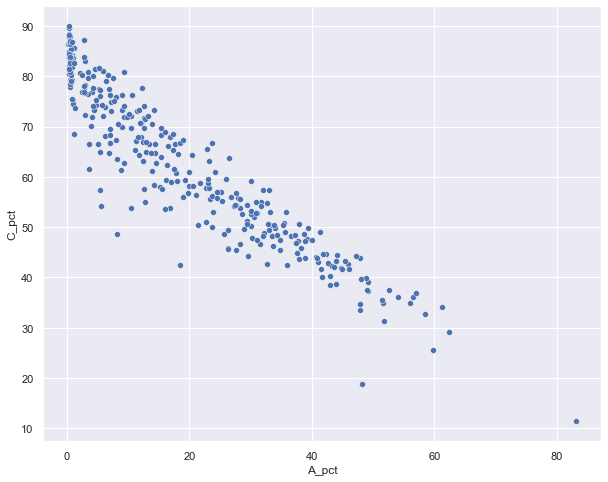

In [28]:
sns.scatterplot(data=econ_data, x="A_pct", y="C_pct")
plt.show()

### Bubble Chart

Μέσω της συνάρτησης scatterplot() της βιβλιοθήκης seaborn είναι δυνατή η δημιουργία _bubble charts_.
Στην συνάρτηση αυτή υπάρχει η παράμετρος _size_ η οποία καθορίζει το μέγεθος του κύκλου με βάση μια στήλη με αριθμητικά δεδομένα.

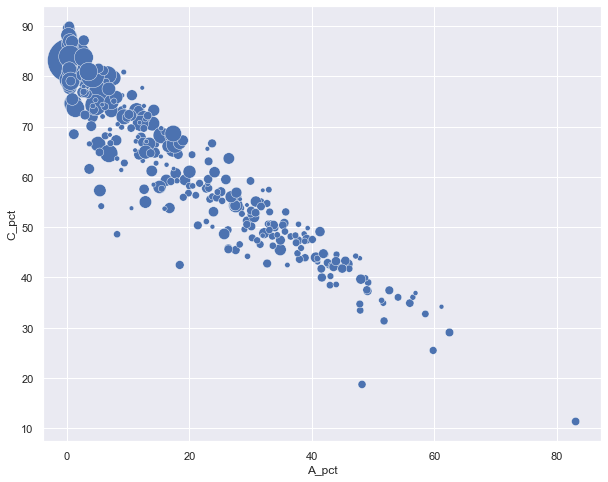

In [29]:
sns.scatterplot(data=econ_data, x="A_pct", y="C_pct", size="Σύνολο", legend=False, sizes=(20, 2000))
plt.show()

## Ο συντελεστής συσχέτισης, γραμμή παλινδρόμησης, γράφημα μήτρας συσχετίσεων 

Για την επίδειξη του κώδικα της τρέχουσας ενότητας θα αξιοποιηθούν δεδομένα απασχόλησης κατά επίπεδο εκπαίδευσης από την ΕΛ.ΣΤΑΤ.  Στόχος είναι να υπολογίσουμε τον συντελεστής συσχέτισης ανάμεσα στο ποσοστό πτυχιούχων πρωτοβάθμιας εκπαίδευσης και το ποσοστό απασχολουμένων στον τριτογενή τομέα.

**Πηγή**: ΕΛΣΤΑΤ, Οικονομικά χαρακτηριστικά 2011, Β.10 Απασχολούμενοι κατά επίπεδο εκπαίδευσης. Δήμοι, https://www.statistics.gr/el/statistics/-/publication/SAM04/2011 (Πρόσβαση, 28/12/2022)

Ως συνήθως ξεκινάμε με την ανάγνωση του σχετικού αρχείου.

In [30]:
edu_data = pd.read_csv("../docs/plots_data/A1602_SAM04_TB_DC_00_2011_B10_F_GR.csv",sep=';') 
edu_data = edu_data[edu_data['Γεωγραφικό επίπεδο']==5]

edu_data['Γεωγραφικό επίπεδο'] = edu_data['Γεωγραφικό επίπεδο'].astype('int') # SOS μετατροπή στήλης σε ακέραιο

edu_data = edu_data.rename(columns={'Γεωγραφικός κωδικός': 'DHMOSID'})
edu_data['DHMOSID'] = edu_data['DHMOSID'].astype(str) # μετατροπή στήλης σε συμβολοσειρά
edu_data['DHMOSID'] = edu_data['DHMOSID'].str[1:] # αφαίρεση πρώτου χαρακτήρα για να ταιριάζει με το DHMOSID του econ_data

Υπολογισμός του ποσοστού πτυχιούχων ανά βαθμίδα εκπαίδευσης

In [31]:

edu_data[['clevel_pct', 'metadeyt_pct', 'blevel_pct', 'alevel_pct']] = edu_data[['Κάτοχοι διδακτορικού ή μεταπτυχιακού τίτλου  / Πτυχιούχοι Παν/μίου - Πολυτεχνείου, ΑΤΕΙ, ΑΣΠΑΙΤΕ ανώτερων επαγγελματικών και ισότιμων σχολών', 
                                                  'Πτυχιούχοι μεταδευτεροβάθμιας εκπαίδευσης (ΙΕΚ, Κολλέγια κλπ.) / Απόφοιτοι Λυκείου (Γενικού, Εκκλησιαστικού, Επαγγελματικού κλπ.)', 
                                                  'Απόφοιτοι τριτάξιου Γυμνασίου και πτυχιούχοι Επαγγελματικών Σχολών',
                                                 'Απόφοιτοι Δημοτικού / Άλλη περίπτωση(1)']].apply(lambda x: 100*x/x.sum(), axis=1)



### Σύνδεση πινάκων

In [32]:
df_cd = pd.merge(econ_data, edu_data, how='inner', on = 'DHMOSID')

In [33]:
df_cd.columns


Index(['Επίπεδο διοικητικής διαίρεσης', 'DHMOSID', 'Περιγραφή', 'Σύνολο_x',
       'Σύνολο οικονομικών ενεργών', 'Σύνολο απασχολούμενων',
       'Πρωτογενής Τομέας', 'Δευτερογενής Τομέας', 'Τριτογενής Τομέας',
       'Ανεργοι', 'Οικονομικά μη ενεργοί', 'A_pct', 'B_pct', 'C_pct',
       'unempl_pct', 'Γεωγραφικό επίπεδο', 'Περιγραφή τόπου μόνιμης διαμονής ',
       'Σύνολο_y',
       'Κάτοχοι διδακτορικού ή μεταπτυχιακού τίτλου  / Πτυχιούχοι Παν/μίου - Πολυτεχνείου, ΑΤΕΙ, ΑΣΠΑΙΤΕ ανώτερων επαγγελματικών και ισότιμων σχολών',
       'Πτυχιούχοι μεταδευτεροβάθμιας εκπαίδευσης (ΙΕΚ, Κολλέγια κλπ.) / Απόφοιτοι Λυκείου (Γενικού, Εκκλησιαστικού, Επαγγελματικού κλπ.)',
       'Απόφοιτοι τριτάξιου Γυμνασίου και πτυχιούχοι Επαγγελματικών Σχολών',
       'Απόφοιτοι Δημοτικού / Άλλη περίπτωση(1)', 'clevel_pct', 'metadeyt_pct',
       'blevel_pct', 'alevel_pct'],
      dtype='object')

### Ο συντελεστής συσχέτισης Pearson

Ο συντελεστής συσχέτισης  περιγράφει την στατιστική εξάρτηση μεταξύ δύο μεταβλητών.

In [34]:
corr = df_cd['alevel_pct'].corr(df_cd['C_pct'], method='pearson')  # οι δυνατές τιμές για την παράμετρο method είναι 'pearson', 'kendall' ή 'spearman'
corr

-0.867723183833861

### Γραμμή παλινδρόμησης

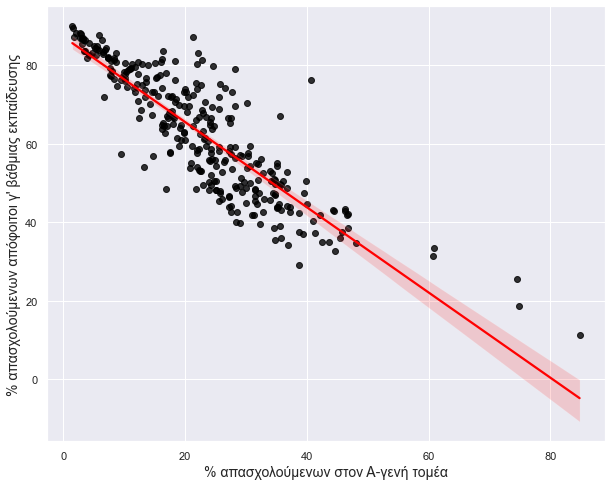

In [35]:
myplot = sns.regplot(data=df_cd, 
            x="alevel_pct", 
            y="C_pct", 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

myplot.set_xlabel('% απασχολούμενων στον Α-γενή τομέα', fontsize = 14)
myplot.set_ylabel ('% απασχολούμενων απόφοιτοι γ\' βάθμιας εκπαίδευσης', fontsize = 14)
sns.set(rc={"figure.figsize": (10, 8)})
plt.show()

Είναι δυνατή η αποθήκευση ενός διαγράμματος σε μορφή εικόνας:

In [36]:
fig = myplot.get_figure()
fig.savefig("../docs/plots_data/output/out_linear.png") 

### Γράφημα μήτρας συσχετίσεων (Correlation matrix)

Για το συγκεκριμένο παράδειγμα θα χρησιμοποιηθεί ένα διαδεδομένο αρχείο δεδομένων, το αρχείο Iris. 
Το αρχείο Iris χρησιμοποιείται σαν δοκιμαστικό αρχείο για μεθόδους στατιστικής ανάλυσης, μηχανικής εκμάθηση και οπτικοποίησης και περιλαμβάνει 50 εγγραφές για κάθε ένα από τα είδη λουλουδιών Iris setosa, Iris virginica, και Iris versicolor για το μήκος και το πλάτος για τα σέπαλα και τα πέταλα τους. Περισσότερες λεπτομέρειες για το συγκεκριμένο αρχείο δεδομένων μπορείτε να βρείτε στην [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).


Ως συνήθως αρχικά γίνεται η ανάγνωνση του σχετικού αρχείου:

In [37]:
iris = pd.read_csv('../docs/plots_data/Iris.csv')

Η μήτρα συσχετίσεων καλέιται μέσω της μεθόδου _corr()_ ενός pandas dataframe και υπολογίζει την συσχέτιση μεταξύ των στηλών του αντίστοιχου dataframe. To αποτέλεσμα είναι ένα dataframe.

Στο τρέχον παράδειγμα η μήτρα συσχετίσεων υπολογίζεται με:

In [39]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
corr = iris.drop(columns=['Id']).corr( numeric_only=True)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Στην συνέχεια μπορεί να γίνει οπτικοποίηση σε διάγραμμα με την συνάρτηση _heatmap_ της βιβλιοθήκης _seaborn_.

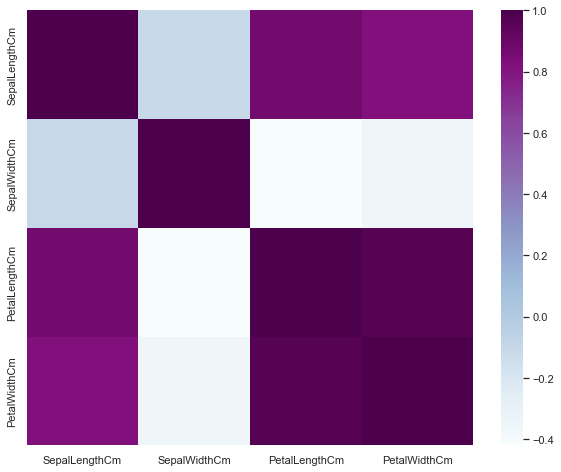

In [44]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,   cmap="BuPu")


plt.show()